In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import suport.patchesMethods as pm
import os

In [3]:
# Calculating Masks
def create_Masks(mask):
    # edge definition
    edges = cv2.Canny(mask,100,200)
    kernel = np.ones((11,11))
    dilated_edge = cv2.dilate(edges, kernel, iterations=1)
    inv_edge     = cv2.bitwise_not(dilated_edge)

    # Inverting the mask 
    mask_inverted = cv2.bitwise_not(mask)

    # Normalize to the range [0., 1.]
    mask = mask.astype(np.float64) / 255.
    mask_inverted = mask_inverted.astype(np.float64) / 255.
    dilated_edge = dilated_edge.astype(np.float64) / 255.
    inv_edge     = inv_edge.astype(np.float64) / 255.

    zone0 = mask * inv_edge
    zone1 = mask_inverted * inv_edge

    fullmask = zone0*1 + dilated_edge*2 +zone1*3

    return dilated_edge, zone0, zone1, fullmask

def sampleBreak(sample, mask):
    dilated_edge, zone0, zone1, fullmask = create_Masks(mask)
    sample_dilated_edge = sample * dilated_edge
    sample_reduced  = sample * zone0
    sample_inverted = sample * zone1
    return sample_dilated_edge, sample_reduced, sample_inverted

def incomplete(mask):
    # The texture can be synthesized while the mask has unfilled entries.
    mh, mw = mask.shape[:2]
    num_completed = np.count_nonzero(mask)
    num_incomplete = (mh * mw) - num_completed
    return num_incomplete 
    
def load(path):
    # verifique a existencia do arquivo path
    if not os.path.exists(path):
        raise FileNotFoundError(f"O arquivo {path} não foi encontrado.")
    sample = cv2.imread(path)
    sample = cv2.cvtColor(sample, cv2.COLOR_BGR2GRAY)
    return sample

In [32]:
print(sample_path)

tgs_salt/2a6477aee8.png


In [43]:
name='2a6477aee8' #3ce657b8f7 2a6477aee8 1d798aa5d5 1bd1c8c771 3ce657b8f7

sample_path='tgs_salt/' + name +'.png'     #1bd1c8c771.png"


# combine as strigs para formar o caminho completo
sample_semantic_mask_path = sample_path.replace(".png", "Mask.png")

# troque png por jpg

generat_mask_path="tgs_salt/0bdd44d530Mask.png" 



sample = load(sample_path)
mask   = load(sample_semantic_mask_path)

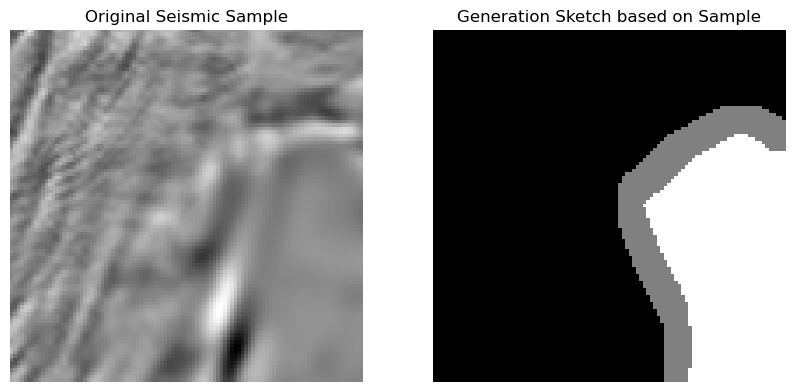

In [44]:
#Divide a mascara em zonas
dilated_edge, zone0, zone1, fullmask = pm.create_Masks(mask, True,size=7)
#Cria o sketch - combine as imagens edge, zone0, zone1 em uma so imagem com diferentes tons de cinza
full = zone0*3 +dilated_edge*2 + zone1*1

pm.showImages([sample, full], ["Original Seismic Sample",  "Generation Sketch based on Sample"], (10,10))

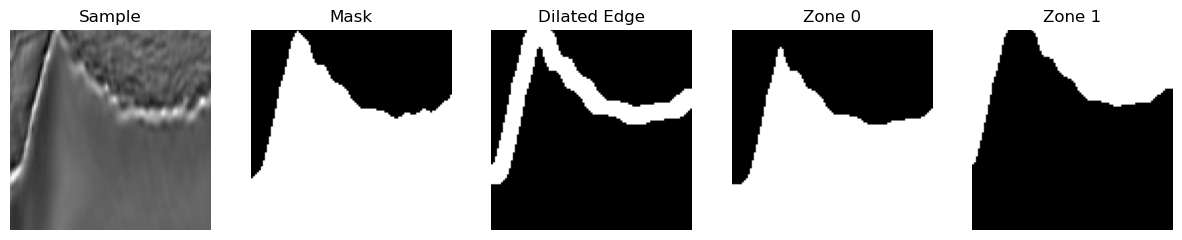

In [17]:
pm.showImages([sample, mask, dilated_edge, zone0, zone1], ["Sample", "Mask", "Dilated Edge", "Zone 0", "Zone 1"], (15,15))

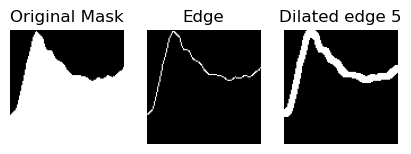

In [16]:
mask = cv2.imread(sample_semantic_mask_path)
# if not null
if mask is not None:
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(mask,100,200)
    kernel = np.ones((5,5))
    dilated_edge = cv2.dilate(edges, kernel, iterations=1)
    # plt imshow 3 columns
    plt.figure(figsize=(5,5))
    plt.subplot(131),plt.imshow(mask,cmap = 'gray')
    plt.title('Original Mask'), plt.xticks([]), plt.yticks([])
    plt.axis('off')
    plt.subplot(132),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge'), plt.xticks([]), plt.yticks([])
    plt.axis('off')
    plt.subplot(133),plt.imshow(dilated_edge,cmap = 'gray')
    plt.title('Dilated edge 5'), plt.xticks([]), plt.yticks([])
    plt.axis('off')
    plt.show()
else:
    print("Mask not found") 

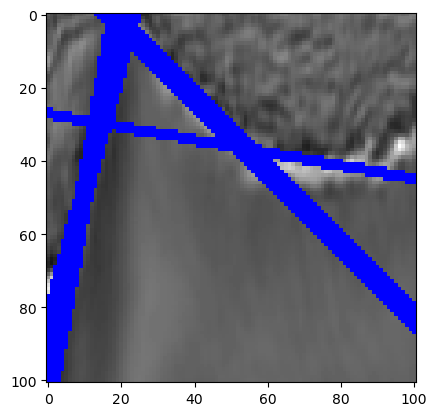

In [29]:
original = cv2.imread(sample_path)
edges = cv2.Canny(original,100,200)

# This returns an array of r and theta values
lines  = cv2.HoughLines(edges, 1, np.pi/36, 30)
 # Probabilistic Line Transform
linesP = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, None, 50, 10)

img  = original.copy()
imgP = original.copy()

# The below for loop runs till r and theta values
# are in the range of the 2d array
for r_theta in lines:
	arr = np.array(r_theta[0], dtype=np.float64)
	r, theta = arr
	a = np.cos(theta)
	b = np.sin(theta)
	x0 = a*r
	y0 = b*r
	x1 = int(x0 + 1000*(-b))
	y1 = int(y0 + 1000*(a))
	x2 = int(x0 - 1000*(-b))
	y2 = int(y0 - 1000*(a))
	cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Draw the lines
if linesP is not None:
	for i in range(0, len(linesP)):
		l = linesP[i][0]
		cv2.line(imgP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)	

# All the changes made in the input image are finally
# written on a new image houghlines.jpg
#cv2.imwrite('masklinesDetected.jpg', img)
plt.imshow(img)
plt.show()

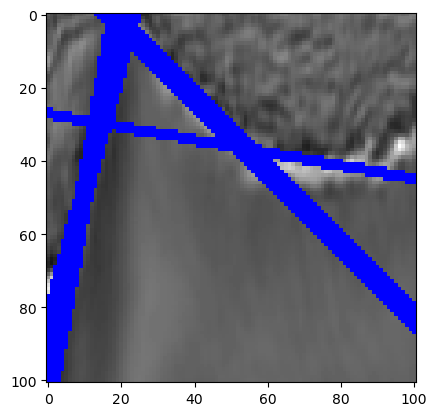

In [30]:
# All the changes made in the input image are finally
# written on a new image houghlines.jpg
cv2.imwrite('masklinesDetected.jpg', original)
plt.imshow(img)
plt.show() 

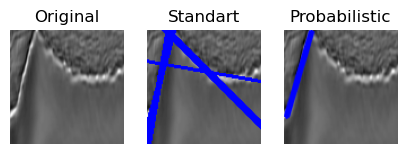

In [31]:
pm.showImages([original, img, imgP], ["Original", "Standart", "Probabilistic"], (5, 5))

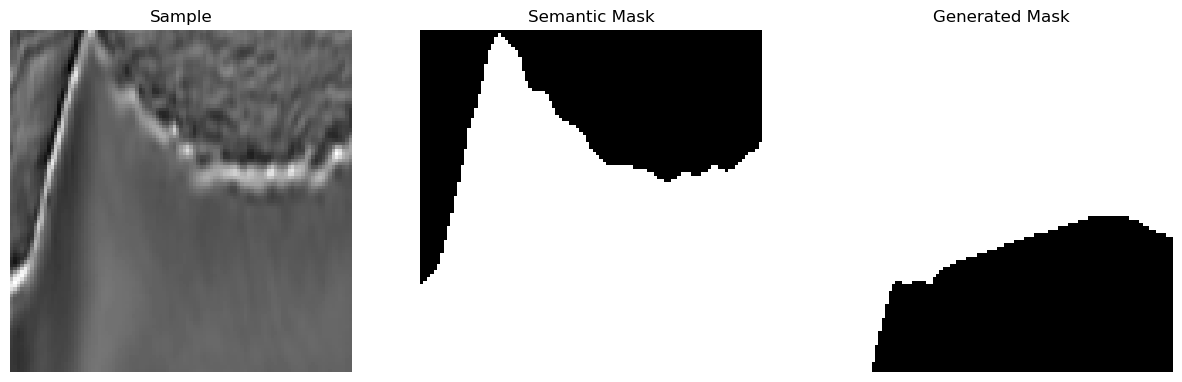

In [32]:
sample = load(sample_path)
sample_semantic_mask = load(sample_semantic_mask_path)
generat_mask = load(generat_mask_path)

pm.showImages([sample, sample_semantic_mask, generat_mask], ["Sample", "Semantic Mask", "Generated Mask"], (15, 15))

In [33]:
sample = cv2.imread("../tgs_salt/1bd1c8c771.png")
# Convert original to sample representation.
sample = cv2.cvtColor(sample, cv2.COLOR_BGR2GRAY)

# Convert sample to floating point and normalize to the range [0., 1.]
sample = sample.astype(np.float64)
sample = sample / 255.

# Create Masks

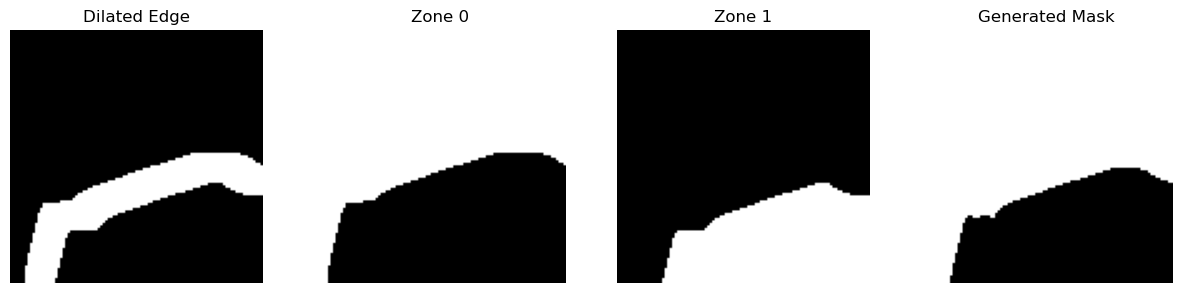

In [34]:
dilated_edge, zone0, zone1, fullmask = pm.create_Masks(generat_mask)
pm.showImages([dilated_edge, zone0, zone1, generat_mask], ["Dilated Edge", "Zone 0", "Zone 1", "Generated Mask"], (15,15))

# Particiona Amostra

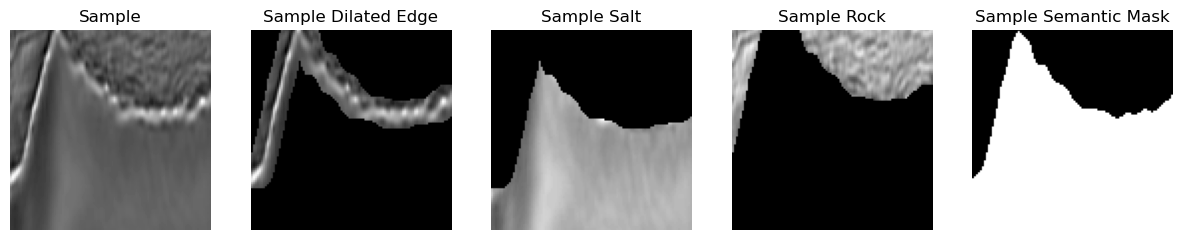

In [40]:
sample_dilated_edge, sample_reduced, sample_inverted = pm.sampleBreak(sample, sample_semantic_mask)
pm.showImages([sample, sample_dilated_edge, sample_reduced, sample_inverted, sample_semantic_mask], ["Sample","Sample Dilated Edge", "Sample Salt", "Sample Rock", "Sample Semantic Mask"], (15,15))


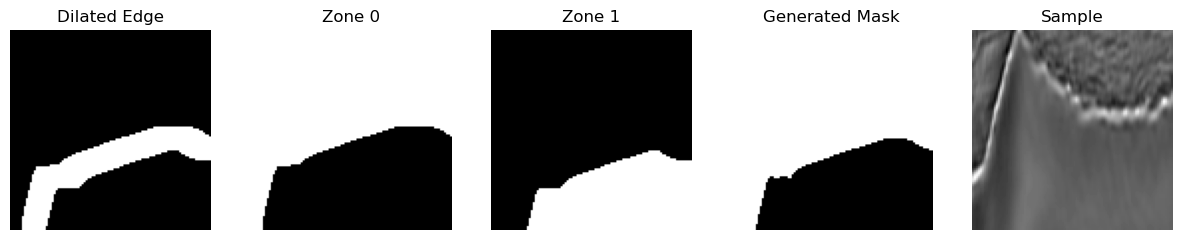

In [36]:
pm.showImages([dilated_edge, zone0, zone1, generat_mask, sample], ["Dilated Edge", "Zone 0", "Zone 1", "Generated Mask", "Sample"], (15,15))

# Load images and show

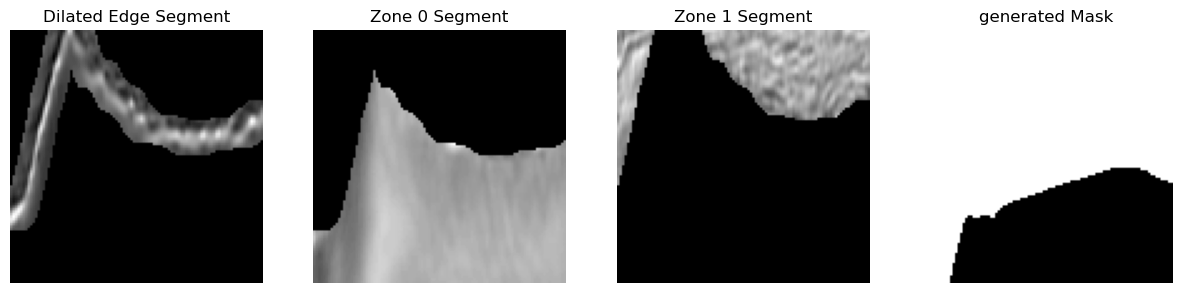

In [37]:
pm.showImages([sample_dilated_edge, sample_reduced, sample_inverted, generat_mask], ["Dilated Edge Segment", "Zone 0 Segment", "Zone 1 Segment", "generated Mask"], (15,15))

In [38]:
generat_mask
incomplete(generat_mask)

3243